In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys
import matplotlib as mpl
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
font_name
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻

<font color=red>
    
### 단순 선형 회귀모델
<font>

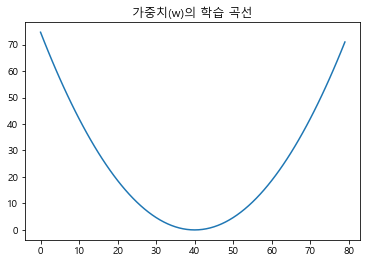

In [72]:
### 데이터 준비 ###
X_train = [1, 2, 3]
y_train = [1, 2, 3]

# 입력된 X의 결과값 y가 위와 같으려면
# wx + b = y 에서 w=1, b=0이어야 함
# 이런식으로 w, b를 찾아가는 과정임

# 이 w를 찾는 과정을 알아볼 것입니당 ^-^
W = tf.placeholder(tf.float32)

### 가설 준비(wx+b) ###
# 예측값
hypot = W * X_train # W는 이따가 반복문에서 넣어줄겁니다

# 비용 함수 준비 : (예측값 - 실제값)^2
cost = tf.reduce_mean(tf.square(hypot - y_train))

########################### 텐서플로우 그래프 완성 ###########################

# 비용함수를 그래프로 그리기
sess = tf.Session()

cost_val = []
# w 찾을 반복문쓰
for i in range(-30, 50):
    cost_result = sess.run(cost, feed_dict={W:i*0.1}) # 실행할 때 W한테 i*0.1값을 넘겨줘서 학습 시켜 봅니다
#     print(cost_result) # 비용이 가장 낮은 지점이 우리가 찾고자 하는 지점, 학습의 목표
    cost_val.append(cost_result)

plt.plot(cost_val) # 가중치(w)의 학습 곡선
plt.title("가중치(w)의 학습 곡선")

sess.close()

<font color=red>
    
### 경사하강 알고리즘을 이용한 가중치 학습
<font>

In [41]:
### 데이터 준비 ###
X_train = [1, 2, 3]
y_train = [1, 2, 3]

# wx + b = y 에서 y를 찾기 위해 W와 b를 준비해야함
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight") # 스스로 값을 바꿔가며 직접 찾아야하니까 placeholder 말고 Variable
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

### 가설 준비 ###
hypothesis = W * X_train + b

### 비용 함수 준비 ###
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

### 최저비용 학습을 위한 경사 하강 알고리즘(Graidiant Descent)

# Graidiant Descent : W := W(가중치) - α(하이퍼파라미터) * cost * 실제값
# 0.1 = 하이퍼파라미터, 내가 이것저것 넣어서 시도해볼....
learning_rate = 0.01
gradiant = tf.reduce_mean((W * X_train - y_train) * X_train)
descent = W - learning_rate * gradiant
update = W.assign(descent) # W :=  → 다시 W에다가 할당하면서 반복해서 학습하는 거

########################### 텐서플로우 그래프 완성 ###########################

# 경사하강 알고리즘을 그래프로 그리기
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # Variable을 썼으니까 초기화 시키고 ㄱㄱ

for step in range(21):
    _, c, w = sess.run([update, cost, W])
    print("step : {} / cost : {} / W : {}".format(step, c, w))

sess.close()

step 0 / cost 8.8780517578125 / [-0.6767317]
step 1 / cost 7.859887599945068 / [-0.5984842]
step 2 / cost 6.947781085968018 / [-0.5238883]
step 3 / cost 6.1314473152160645 / [-0.4527735]
step 4 / cost 5.401566028594971 / [-0.3849774]
step 5 / cost 4.749694347381592 / [-0.32034513]
step 6 / cost 4.168186187744141 / [-0.25872904]
step 7 / cost 3.6501166820526123 / [-0.19998835]
step 8 / cost 3.189216375350952 / [-0.14398889]
step 9 / cost 2.7798092365264893 / [-0.09060274]
step 10 / cost 2.416760206222534 / [-0.03970795]
step 11 / cost 2.095421552658081 / [0.00881176]
step 12 / cost 1.8115878105163574 / [0.05506721]
step 13 / cost 1.5614581108093262 / [0.09916407]
step 14 / cost 1.3415943384170532 / [0.14120308]
step 15 / cost 1.148889183998108 / [0.18128027]
step 16 / cost 0.9805346131324768 / [0.21948719]
step 17 / cost 0.8339949250221252 / [0.2559111]
step 18 / cost 0.7069792151451111 / [0.29063526]
step 19 / cost 0.5974201560020447 / [0.32373893]
step 20 / cost 0.5034521818161011 / [

In [45]:
### 데이터가 나중에 제공될 때 ###
X_train = tf.placeholder(tf.float32, shape=[None]) # shape=[??] : 값을 ??개만 받아오겠다
y_train = tf.placeholder(tf.float32, shape=[None]) # shape=[None] : 값의 갯수를 지정하지 않고 받아오겠다

# wx + b = y 에서 y를 찾기 위해 W와 b를 준비해야함
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

### 가설 준비 ###
hypothesis = W * X_train + b

### 비용 함수 준비 ###
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

### 최저비용 학습을 위한 경사 하강 알고리즘(Graidiant Descent)

# Graidiant Descent : W := W(가중치) - α(하이퍼파라미터) * cost * 실제값
# 0.1 = 하이퍼파라미터, 내가 이것저것 넣어서 시도해볼....
learning_rate = 0.01
gradiant = tf.reduce_mean((W * X_train - y_train) * X_train)
descent = W - learning_rate * gradiant
update = W.assign(descent) # W :=  → 다시 W에다가 할당하면서 반복해서 학습하는 거

########################### 텐서플로우 그래프 완성 ###########################

# 경사하강 알고리즘 확인하기
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # Variable을 썼으니까 초기화 시키고 ㄱㄱ

for step in range(21):
    _, c, w = sess.run([update, cost, W],
                       feed_dict={X_train:[1, 2, 3, 4, 5], y_train:[1, 2, 3, 4, 5]}) # 데이터 값 여기서 넘겨줌~
    print("step : {} / cost : {} / W : {}".format(step, c, w))

sess.close()

step : 0 / cost : 8.834877014160156 / W : [0.47872943]
step : 1 / cost : 7.626119136810303 / W : [0.53606915]
step : 2 / cost : 6.627128601074219 / W : [0.5871016]
step : 3 / cost : 5.798861026763916 / W : [0.63252044]
step : 4 / cost : 5.109890460968018 / W : [0.6729432]
step : 5 / cost : 4.534876823425293 / W : [0.7089194]
step : 6 / cost : 4.053348064422607 / W : [0.74093825]
step : 7 / cost : 3.6487369537353516 / W : [0.76943505]
step : 8 / cost : 3.3076014518737793 / W : [0.7947972]
step : 9 / cost : 3.019017457962036 / W : [0.8173695]
step : 10 / cost : 2.774078369140625 / W : [0.83745885]
step : 11 / cost : 2.5655112266540527 / W : [0.8553384]
step : 12 / cost : 2.3873536586761475 / W : [0.87125117]
step : 13 / cost : 2.234708309173584 / W : [0.8854135]
step : 14 / cost : 2.10353946685791 / W : [0.89801806]
step : 15 / cost : 1.9905102252960205 / W : [0.9092361]
step : 16 / cost : 1.8928539752960205 / W : [0.9192201]
step : 17 / cost : 1.8082683086395264 / W : [0.9281059]
step :

In [67]:
### 텐서플로우의 경사하강 알고리즘 함수를 이용할 때 ###

X_train = tf.placeholder(tf.float32, shape=[None]) # shape=[??] : 값을 ??개만 받아오겠다
y_train = tf.placeholder(tf.float32, shape=[None]) # shape=[None] : 값의 갯수를 지정하지 않고 받아오겠다

# wx + b = y 에서 y를 찾기 위해 W와 b를 준비해야함
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

### 가설 준비 ###
hypothesis = W * X_train + b

### 비용 함수 준비 ###
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

### 최저비용 학습을 위한 경사 하강 알고리즘(Graidiant Descent)

# Graidiant Descent : W := W(가중치) - α(하이퍼파라미터) * cost * 실제값
# 0.1 = 하이퍼파라미터, 내가 이것저것 넣어서 시도해볼....
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 위 두줄 하나로 쓸 수 이찌? optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

# 경사하강 알고리즘 확인하기
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # Variable을 썼으니까 초기화 시키고 ㄱㄱ

for step in range(2001):
    _, curr_c, curr_w, curr_b = sess.run([train, cost, W, b],
                       feed_dict={X_train:[1, 2, 3, 4, 5], y_train:[2.1, 3.1, 4.1, 5.1, 6.1]}) # 데이터 값 여기서 넘겨줌~
    if step % 100 == 0 :
        print("step : {} / cost : {} / W : {} / b : {}".format(step, curr_c, curr_w, curr_b))

# learning Rate조 중요하지만, 충분한 학습 횟수도 중요


step : 0 / cost : 1.538783311843872 / W : [1.1073107] / b : [-0.2176714]
step : 100 / cost : 0.14577217400074005 / W : [1.2470385] / b : [0.20811282]
step : 200 / cost : 0.0740475207567215 / W : [1.1760688] / b : [0.4643356]
step : 300 / cost : 0.03761374205350876 / W : [1.1254876] / b : [0.64695024]
step : 400 / cost : 0.01910652592778206 / W : [1.0894371] / b : [0.7771034]
step : 500 / cost : 0.00970547553151846 / W : [1.0637436] / b : [0.8698657]
step : 600 / cost : 0.004930044990032911 / W : [1.045431] / b : [0.9359794]
step : 700 / cost : 0.0025042961351573467 / W : [1.0323795] / b : [0.9830995]
step : 800 / cost : 0.0012720994418486953 / W : [1.0230774] / b : [1.0166831]
step : 900 / cost : 0.0006461740122176707 / W : [1.0164477] / b : [1.0406188]
step : 1000 / cost : 0.00032823352375999093 / W : [1.0117224] / b : [1.0576781]
step : 1100 / cost : 0.00016673676145728678 / W : [1.0083549] / b : [1.069836]
step : 1200 / cost : 8.469658496323973e-05 / W : [1.0059547] / b : [1.0785015

In [69]:
# Tesitng
print(sess.run(hypothesis, feed_dict={X_train:[27]}))

sess.close()

[28.10928]


In [ ]:
# 아래의 데이터를 가지고 하루 6시간을 일했을 때 매출액이 얼마인지 예측하시오
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]



In [82]:
### 데이터 준비 ###
X_data = [1, 2, 3, 4, 5, 6, 7]
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

# wx + b = y 에서 y를 찾기 위해 W와 b를 준비해야함
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight") # 스스로 값을 바꿔가며 직접 찾아야하니까 placeholder 말고 Variable
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

### 가설 준비 ###
hypothesis = W * X_data + b

### 비용 함수 준비 ###
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

### 최저비용 학습을 위한 경사 하강 알고리즘(Graidiant Descent)

# Graidiant Descent : W := W(가중치) - α(하이퍼파라미터) * cost * 실제값
# 0.1 = 하이퍼파라미터, 내가 이것저것 넣어서 시도해볼....
learning_rate = 0.01
gradiant = tf.reduce_mean((W * X_data - y_data) * X_data)
descent = W - learning_rate * gradiant
update = W.assign(descent) # W :=  → 다시 W에다가 할당하면서 반복해서 학습하는 거

########################### 텐서플로우 그래프 완성 ###########################

# 경사하강 알고리즘을 그래프로 그리기
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # Variable을 썼으니까 초기화 시키고 ㄱㄱ

for step in range(2001):
    _, curr_c, curr_w, curr_b = sess.run([update, cost, W, b])
    if step % 100 == 0 :
        print("step : {} / cost : {} / W : {} / b : {}".format(step, curr_c, curr_w, curr_b))\

print(sess.run(hypothesis, feed_dict={X_data:8}))

sess.close()

step : 0 / cost : 13456263168.0 / W : [5184.555] / b : [0.45890057]
step : 100 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 200 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 300 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 400 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 500 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 600 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 700 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 800 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 900 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 1000 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 1100 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 1200 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 1300 / cost : 9040557.0 / W : [25928.566] / b : [0.45890057]
step : 1400 / cost : 9040557.0 / W : [25928.566] / b : [0

TypeError: unhashable type: 'list'

<font color=red>
    
### 다중 선형 회귀모델
<font>

In [83]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

In [90]:
# 단순하게 처리하는 경우
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = W1*X1 + W2*X2 + W3*X3 + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis-y))

# 최소비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
        if step % 100 == 0:
            print("step : {} / co : {} / hy : {}".format(step, co, hy))
            ## hy : [nan nan nan nan nan] / co : nan 러닝레이트가 너무 커서 범위를 벗어났다는 뜻
            
            ## hypothesis 결과값이 아래로 갈 수록 실제 결과갑에 근사값으로 바껴가네욤 호옹이

ValueError: Dimensions must be equal, but are 1 and 5 for 'MatMul_2' (op: 'MatMul') with input shapes: [3,1], [5,3].

In [95]:
# Matrix로 처리하는 경우
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3]) # 5개로 들어와서 3개로 나감
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) # 3개로 들어와서 1개로 나감
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = tf.matmul(X, W) + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis-y))

# 최소비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X:x_data, y:y_data})
        if step % 100 == 0:
            print("step : {} / co : {} / hy : {}".format(step, co, hy))
            ## hy : [nan nan nan nan nan] / co : nan 러닝레이트가 너무 커서 범위를 벗어났다는 뜻
            
            ## hypothesis 결과값이 아래로 갈 수록 실제 결과갑에 근사값으로 바껴가네욤 호옹이

step : 0 / co : 98256.734375 / hy : [[-123.934204]
 [-151.44714 ]
 [-147.95238 ]
 [-162.3422  ]
 [-114.87619 ]]
step : 100 / co : 2.89465594291687 / hy : [[154.1288 ]
 [182.88733]
 [181.40877]
 [196.33214]
 [140.16066]]
step : 200 / co : 2.7511019706726074 / hy : [[154.06505]
 [182.93094]
 [181.38913]
 [196.31885]
 [140.2171 ]]
step : 300 / co : 2.615109920501709 / hy : [[154.003  ]
 [182.97337]
 [181.36998]
 [196.30592]
 [140.27203]]
step : 400 / co : 2.486309289932251 / hy : [[153.94263]
 [183.0147 ]
 [181.35138]
 [196.2934 ]
 [140.32549]]
step : 500 / co : 2.3642525672912598 / hy : [[153.88382]
 [183.05492]
 [181.33322]
 [196.28117]
 [140.37747]]
step : 600 / co : 2.248649835586548 / hy : [[153.82658]
 [183.09404]
 [181.31557]
 [196.2693 ]
 [140.42809]]
step : 700 / co : 2.1391494274139404 / hy : [[153.77087]
 [183.13214]
 [181.29837]
 [196.2578 ]
 [140.4773 ]]
step : 800 / co : 2.0353896617889404 / hy : [[153.71663]
 [183.16924]
 [181.28165]
 [196.24658]
 [140.5252 ]]
step : 900 / 

<font color=red>
    
### DASK
</font>

    - 가상 데이터프레임
    - 병렬처리용 작업스케쥴러

In [121]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting data/sample1.csv


In [100]:
df1 = pd.read_csv("data/sample1.csv")
df1
df1[" c2"].mean()

2.22

In [107]:
import dask.dataframe as dd

df2 = dd.read_csv("data/sample1.csv")
df2
"""↓↓↓실제 데이터를 갖고오지 않고 틀(데이터형식 포함)만 갖고왔어ㅇㅅㅇ
Dask DataFrame Structure:
                  c1       c2      c3
npartitions=1                        
               int64  float64  object
                 ...      ...     ...
Dask Name: from-delayed, 3 tasks
"""
df2.head() # 필요한 데이터만 메모리에 올려놔줌. 그래서 head쓰면 데이터 읽어옴

df2[" c2"].mean() # → dd.Scalar<series-..., dtype=float64> 걍 객체로 나옴

df2[" c2"].mean().compute() # → 2.22

C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


2.22

In [115]:
### 병렬처리

df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines=False)

df3.tail()
df3.count().compute() # 데이터 전체 갯수

[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed | 30.8s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [110]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [112]:
%%time
df3.count().compute()

[########################################] | 100% Completed |  3.2s
Wall time: 3.25 s


ID                            482913
Case Number                   482913
Date                          482913
Block                         482913
IUCR                          482913
Primary Type                  482913
Description                   482913
Location Description          481264
Arrest                        482913
Domestic                      482913
Beat                          482913
District                      482912
Ward                          482902
Community Area                482911
FBI Code                      482913
X Coordinate                  476932
Y Coordinate                  476932
Year                          482913
Updated On                    482913
Latitude                      476932
Longitude                     476932
Location                      476932
Historical Wards 2003-2015    475376
Zip Codes                     476932
Community Areas               475577
Census Tracts                 475795
Wards                         475580
B

In [114]:
%%time
df3.count().compute(scheduler="processes", num_workers=4) # 프로세스를 4개 쓰겠다

[########################################] | 100% Completed |  2.7s
Wall time: 2.68 s


ID                            482913
Case Number                   482913
Date                          482913
Block                         482913
IUCR                          482913
Primary Type                  482913
Description                   482913
Location Description          481264
Arrest                        482913
Domestic                      482913
Beat                          482913
District                      482912
Ward                          482902
Community Area                482911
FBI Code                      482913
X Coordinate                  476932
Y Coordinate                  476932
Year                          482913
Updated On                    482913
Latitude                      476932
Longitude                     476932
Location                      476932
Historical Wards 2003-2015    475376
Zip Codes                     476932
Community Areas               475577
Census Tracts                 475795
Wards                         475580
B

In [116]:
(df2["c1"] + 3).compute()

[########################################] | 100% Completed |  0.1s


0    4
1    5
2    6
Name: c1, dtype: int64

In [117]:
# 새로운 값 할당

df2 = df2.assign(c1=df2["c1"]-3)
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [119]:
# 새로운 컬럼 추가
df2 = df2.assign(title=df2["c1"].astype(str) + "%")
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\acorn\AppData\Local\Continuum\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:5916: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [122]:
%%writefile "data/sample2.csv"
c1, c2, c3
4, 4.11, one
5, 5.22, two
5, 6.33, three

Writing data/sample2.csv


In [123]:
# 복수데이터

df4 = dd.read_csv("data/sample*.csv") ## samole1 + samole2  둘 다 가져온거
df4.count().compute()

[########################################] | 100% Completed |  0.1s


c1     6
 c2    6
 c3    6
dtype: int64

<font color=red>
    
### Queue Runner
</font>

    - 탠서플로우에서 제공하는 패키지
    - 어떤 파일이 있는지 목록들만 저장 (DASK가 파일을 읽어들이는 것 처럼)

In [135]:
filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])

key, value = tf.TextLineReader().read(filename_queue)
# value : 실제 데이터

# 디코딩
xy = tf.decode_csv(value, record_defaults=[[0.], [0.], [0.], [0.]])


<font color=red>
    
### tf.train.batch
</font>

    - 모아뒀다가 한 번에 처리하는.. 일괄처리...?
    - 뭐에 기준이 된다고 했는데 못들었다..
    
    (1) 처리 방법
        1) Batch
            - 전체 데이터를 모아서 한꺼번에 사용 (1000개의 데이터 → 1번 처리)
        2) Stockastic
            - 한 개의 데이터 낱개를 사용 (1000개의 데이터 → 1000번 처리)
        3) Mini-Batch
            - 가장 많이 사용됨
            - Batch와 Stockastic의 절충안
            - 적당한 갯수를 지정하여 처리
            ex. 200개의 데이터 / 5개씩 처리 → 40번 처리
    
    - epoch? : 반복횟수?

In [139]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)
# xv[0:-1] : 첫번째 데이터부터 마지막까지
# xy[-1:] : 마지막데이터부터 나머지(= 걍 마지막인거 ㅇㅇ)
# batch_size=10 : Mini-Batch, 처리할 데이터 갯수 지정

### 훈련을 시켜 봅시다 ###
# X = tf.placeholder(tf.float32, shape=[25, 3]) # 25개 데이터가 들어와서 3개의 특성으로 나가니까
X = tf.placeholder(tf.float32, shape=[None, 3]) # 앞으로 어떤 데이터가 몇개 들어올지 모를거니까 None
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) # X의 3개를 받고 나가는거 1개ㅑ
b = tf.Variable(tf.random_normal([1]))

### 가설 준비 ###
hypothesis = tf.matmul(X, W) + b
### 비용 함수 ###
cost = tf.reduce_mean(tf.square(hypothesis-y))
### 최소비용 계산 ###
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    ###### 설계만 되어있고 아직 데이터를 읽어 온 상태가 아니니까 데이터를 처리해야하는데
    ###### queue runner가 데이터를 읽어오는 코디네이터
    coord = tf.train.Coordinator()
    # 이 코디네이터한테 일을 시키는 것이다.
    threads = tf.train.start_queue_runners(sess = sess, coord = coord)
    # sess : session이 누군지 알려주고
    # coord : coordinater가 누군지 알려주면 된다.
    
    for step in range(2001) :
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
    
    coord.request_stop()
    coord.join(threads)
    # Thread : 프로세스 안에서 하나하나 시행되는 작업 단위
    # Single Thread : 하나의 작업단위씩만 시행 가능 (ex. 음악들으면서 게임못함)
    # Mult? Thread : 한 번에 여러 개의 작업단위를 시행
    # join : 아직 시행이 끝나지 않은 Thred를 기다렸다가 전체 thred가 모두 동시에 끝나도록 만드는 Method
    
    print("당신의 성적은 ", sess.run(hypothesis, feed_dict={X:[[100, 70, 101]]}))
    print("다른 사람의 성적은 ", sess.run(hypothesis, feed_dict={X:[[60, 70, 110], [90, 100, 80]]}))
    


당신의 성적은  [[196.24667]]
다른 사람의 성적은  [[178.7296 ]
 [173.40656]]


---
<font color=red>
    
## 로지스틱 회귀 모델
</font>

    - 가설공식(시그모이드) : 1/(1+e^-(W^T*X))
    - 비용함수 공식 : -(ylog(H(x)) + (1 - y)log(1 - H(x)))???

In [146]:
### 데이터 준비 ###
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32, shape=[None, 2])
# X = tf.placeholder(tf.float32, shape=[6, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

### 가설 준비(원래는 시그모이드 공식을 쓰면 되는데 함수있으니까 그거 쓰긔) ###
hypothesis = tf.sigmoid(tf.matmul(X,W)+b)
# 선형모델 공식을 시그모이드 함수로 감싸주면 로지스틱 회귀모델의 가설공식~

### 비용 함수(여기도 달라야즤 / 이진분류(0&1)니까~ ###
cost = -tf.reduce_mean(y*tf.log(hypothesis) + (1-y)*tf.log(1-hypothesis))

### 최소비용 계산 ###
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

### 그래프 실행 ###
sess =  tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data}) ### 여기까지가 훈련

### 정확도 검증 ###
# tf.cast() : 불린값을 숫자로 바꿔줌
# tf.cast(True, dtype=tf.float32) → <tf.Tensor 'Cast:0' shape=() dtype=float32>

# 예측
pred = tf.cast(hypothesis > 0.5, dtype=tf.float32) 
# → 예측값이 0.5를 기준으로 위면 1, 아니면 0으로 분류

# 검증
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))

# 검정보고서? 출력?
h, p, a = sess.run([hypothesis, pred, accuracy], feed_dict={X:x_data, y:y_data})
print("\nHypothesis: ", h, "\nPredict: ", p, "\nAccuracy: ", a)


Hypothesis:  [[0.02729675]
 [0.15389991]
 [0.2879425 ]
 [0.78922427]
 [0.9444096 ]
 [0.98180354]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


---
<font color=red>
    
## Softmax Classifier
</font>

    - 소프트맥스
        - 각각의 시그모이드 결과값을 하나로 묶어서 하나의 확률로 확인할 수 있게 해줌
        - One hot : 하나에 스포트라이트를 비춰준다규

In [11]:
### 데이터 준비 ###
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W1 = tf.Variable(tf.random_normal([4, 3]))
b1 = tf.Variable(tf.random_normal([3]))

### 가설 준비(softmax 사용합니당) ###
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

### 비용 함수 ###
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))

### 최소비용 계산 ###
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001): # 훈련시키기
        sess.run(train, feed_dict={X:x_data, y:y_data})
    # 훈련종료
    
    result = sess.run(hypothesis, feed_dict={X:[[1, 11, 7, 9]]}) # 예측
    print(result)
    print(sess.run(tf.arg_max(result, 1))) # 제일 큰 값의 위치인가?

[[0.27874434 0.7196618  0.00159392]]
[1]


---
<font color=red>
    
## Fancy Softmax
</font>

    - softmax_cross_entropy_with_logits()
    - one_hot()
    - reshape()

In [12]:
##### softmax_cross_entropy_with_logits() #####
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))


### Logit(원초적인 공식)을 따로 빼줍니당
logit = tf.matmul(X,W)+b

### 가설 준비(softmax 사용합니당) ###
hypothesis = tf.nn.softmax(logit)

### 비용 함수 ###
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_data) # logits=원초적공식, labels=정답
# = cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))

### 최소비용 계산 ###
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001): # 훈련시키기
        sess.run(train, feed_dict={X:x_data, y:y_data})
    # 훈련종료
    
    result = sess.run(hypothesis, feed_dict={X:[[1, 11, 7, 9]]}) # 예측
    print(result)
    print(sess.run(tf.arg_max(result, 1))) # 제일 큰 값의 위치인가?

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[[3.3099853e-02 9.6688366e-01 1.6505341e-05]]
[1]


In [16]:
##### one_hot() #####
sess = tf.Session()
tf.one_hot([[0], [1], [2], [0]], depth=3).eval(session=sess)
"""2차원 → 3차원
array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)
"""
# one_hot을 쓰면 차원이 바뀌기 때문에 다른 용도로 사용할 때 차원을 다시 바꿔줘야함
# 그래서 reshpae이 따라다니즤

tf.reshape(tf.one_hot([[0], [1], [2], [0]], depth=3).eval(session=sess), shape=[-1, 3]).eval(session=sess)
"""3차원 → 2차원
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)
"""

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### 사례1: 동물 분류 예측 (one_hot encoding)

In [44]:
xy = np.loadtxt("data/data-04-zoo.csv", delimiter=",", dtype=np.float32)

x_data = xy[:, 0:-1] # (101, 16)
y_data = xy[:, [-1]] # (101, 1)

X = tf.placeholder(tf.float32, shape=[None, 16])
y = tf.placeholder(tf.int32, shape=[None, 1])

### 결과값이 0~6 총 7개이므로 결과값을 변환해주겠습니다 ###
y_one_hot = tf.one_hot(y, 7)
y_one_hot = tf.reshape(y_one_hot, shape=[-1, 7])
# y_one_hot = tf.reshape(tf.one_hot(y, 7), shape=[-1, 7])

W = tf.Variable(tf.random_normal([16, 7]))
b = tf.Variable(tf.random_normal([7]))

### Logit(원초적인 공식)을 따로 빼줍니당
logit = tf.matmul(X, W) + b

### 가설 준비 ###
hypothesis = tf.nn.softmax(logit)

### 비용 함수 ###
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_one_hot)
cost = tf.reduce_mean(cost_i)

### 최소비용 계산 ###
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 실수값으로 나오는 hypothesis를 0, 1으로 바꿔서 뭘 확인할거라는데 ㅇㅅㅇ
pred = tf.arg_max(hypothesis, 1)
correct_pred = tf.equal(pred, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) # correct_predfmf 숫자로 바꾸고 (tf.cast로), 평균 내줌

for step in range(2001):
    sess.run(hypothesis, feed_dict={X:x_data, y:y_data})
    
    if step%100==0:
        loss, acc = sess.run([tf.reduce_mean(cost), accuracy], feed_dict={X:x_data, y:y_data})
        print("Step:{:5}\tLoss:{:.3f}\tAcc:{:.2%}".format(step, loss, acc))

# 예측해보자!
pred = sess.run(pred, feed_dict={X:x_data})

# 예측값이 맞는지 비교해보자!
for p, y in zip(pred, y_data.flatten()): # pred는 1차원 y_data는 2차원이니까 flatten으로 1차원으로 변형
    print("[{}] prediction:{} True Y:{}".format(p==int(y), p, int(y)))


Step:    0	Loss:4.140	Acc:25.74%
Step:  100	Loss:4.140	Acc:25.74%
Step:  200	Loss:4.140	Acc:25.74%
Step:  300	Loss:4.140	Acc:25.74%
Step:  400	Loss:4.140	Acc:25.74%
Step:  500	Loss:4.140	Acc:25.74%
Step:  600	Loss:4.140	Acc:25.74%
Step:  700	Loss:4.140	Acc:25.74%
Step:  800	Loss:4.140	Acc:25.74%
Step:  900	Loss:4.140	Acc:25.74%
Step: 1000	Loss:4.140	Acc:25.74%
Step: 1100	Loss:4.140	Acc:25.74%
Step: 1200	Loss:4.140	Acc:25.74%
Step: 1300	Loss:4.140	Acc:25.74%
Step: 1400	Loss:4.140	Acc:25.74%
Step: 1500	Loss:4.140	Acc:25.74%
Step: 1600	Loss:4.140	Acc:25.74%
Step: 1700	Loss:4.140	Acc:25.74%
Step: 1800	Loss:4.140	Acc:25.74%
Step: 1900	Loss:4.140	Acc:25.74%
Step: 2000	Loss:4.140	Acc:25.74%
[False] prediction:5 True Y:0
[True] prediction:0 True Y:0
[False] prediction:5 True Y:3
[False] prediction:5 True Y:0
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[False] prediction:4 True Y:0
[False] prediction:5 True Y:3
[False] prediction:5 True Y:3
[True] prediction:0 True Y:0
[True] pred

### 사례2: MNIST 손글씨 데이터

In [46]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

In [50]:
type(mnist) #tensorflow.contrib.learn.python.learn.datasets.base.Datasets
dir(mnist)
mnist.train.labels
mnist.train.num_examples # 전체데이터 수

55000

In [70]:
X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10]) # one_hot 인코딩이 되어있어서(데이터셋 불러올때 함) 1개 아니고 10개

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

### Logit(원초적인 공식)을 따로 빼줍니당
logit = tf.matmul(X,W) + b

### 가설 준비 ###
hypothesis = tf.nn.softmax(logit)

### 비용 함수 ###
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y)
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))

### 최소비용 계산 ###
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

########################### 텐서플로우 그래프 완성 ###########################

### 정확도 확인 ###
is_corrected = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

### 그래프 실행 ###
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 데이터가 55000개니까 Batch를 써서 멀티 프로세스를 쓰쟈
training_epochs = 50
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size) # batch가 100개니까 데이터를 100으로 쪼개서 총 550개
    
    for i in range(total_batch): # 550번 반복돌리면서
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) # batch 100개를 실행할거얌
        _, loss, acc = sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:batch_xs, y:batch_ys})
        
#     _, loss, acc = sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:batch_xs, y:batch_ys})
#     print("Step:{:5}\tLoss:{:.3f}\tAcc:{:.2%}".format(epoch, loss, acc))


"""
for i in range(total_batch): # total_batch만큼 반복을 한다. 즉 550번 반복해서 이렇게하면 같은 550개 반복되기 때문에
        batch_xs, batch_ys = mnist.train.nest_batch(batch_size)  # next_batch : 다음 배치를 100개까지 실행한다는 것.
"""        

print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))

KeyboardInterrupt: 